# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [4]:
import warnings
warnings.filterwarnings("ignore")

# DataMod

**Описание данных:**

`id` – порядковый номер индивидуального объекта.

`day` – номер дня.

`pressure`– атмосферное давление.

`maxtemp` – максимальная температура в течение дня.

`temperature` – температура в течение дня.

`mintemp` – минимальная температура в течение дня.

`dewpoint` – точка росы.

`humidity` – влажность.

`cloud` – облачность.

`sunshine` – солнечность дня.

Ссылка на испытание:

https://www.kaggle.com/competitions/playground-series-s5e3/overview

In [5]:
# data_test = pd.read_csv("data/test.csv")
# data_train = pd.read_csv("data/train.csv")

In [6]:
data = pd.read_csv("data/train.csv")
data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


<Axes: >

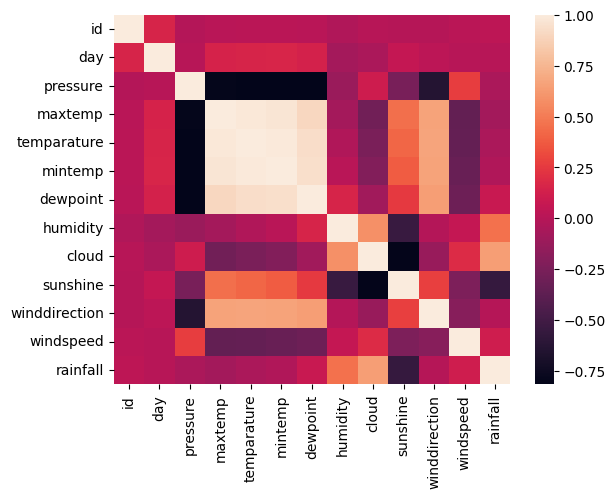

In [7]:
sns.heatmap(data.corr())

In [8]:
def data_clean(data):
    data.drop(['id', 'day', 'maxtemp', 'mintemp', 'sunshine'], axis=1, inplace=True, errors='ignore')
    data.fillna(data.median(), inplace=True)
    scaler = StandardScaler()
    X = scaler.fit_transform(data.drop('rainfall', axis=1))
    y = data['rainfall']
    return X, y

In [9]:
X, y = data_clean(data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Сохранение баланса классов
)

<Axes: >

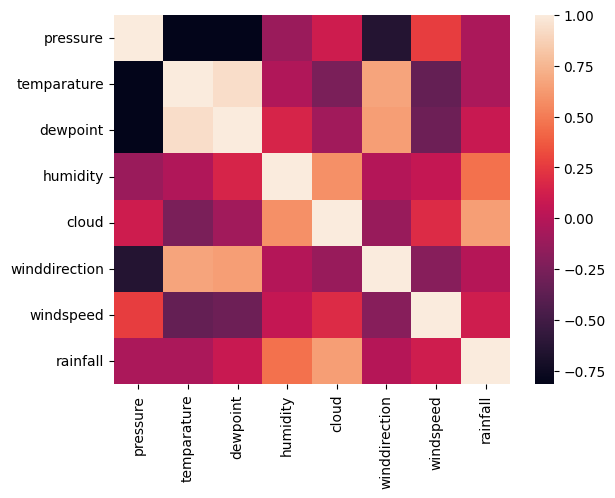

In [10]:
sns.heatmap(data.corr())

# Models

## Graph

In [11]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

## Полносвязная

### Compile

In [12]:
model_fnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history_fnn = model_fnn.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7743 - loss: 0.5091 - val_accuracy: 0.8746 - val_loss: 0.3161
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3605 - val_accuracy: 0.8775 - val_loss: 0.3020
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.3234 - val_accuracy: 0.8718 - val_loss: 0.3255
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8639 - loss: 0.3367 - val_accuracy: 0.8718 - val_loss: 0.3145
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8626 - loss: 0.3435 - val_accuracy: 0.8718 - val_loss: 0.3131
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.3145 - val_accuracy: 0.8746 - val_loss: 0.3113
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3231 - val_accuracy: 0.8746 - val_loss: 0.3152
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3274 - val_accuracy: 0.8718 - val_loss:

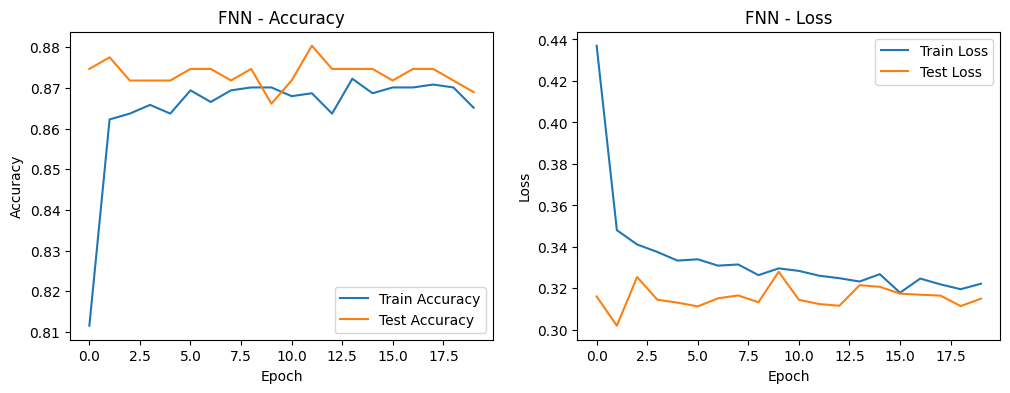

In [14]:
plot_results(history_fnn, "FNN")

In [15]:
model_fnn.save('models/model_fnn.keras')

### Test

In [16]:
model_fnn = load_model('models/model_fnn.keras')

In [17]:
y_pred_fnn = model_fnn.predict(X_test)
y_pred_fnn = (y_pred_fnn > 0.5).astype(int)
print(classification_report(y_test, y_pred_fnn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_fnn))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       108
           1       0.87      0.93      0.90       330

    accuracy                           0.84       438
   macro avg       0.80      0.76      0.78       438
weighted avg       0.84      0.84      0.84       438

ROC-AUC: 0.7599326599326599


## Deep RNN

### Complile

In [18]:
def create_sequences(data, targets, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(targets[i + 1 : i + window_size + 1])  # Прогноз на следующие 7 дней
    return np.array(X), np.array(y)


window_size = 7
X_rnn, y_rnn = create_sequences(X, y, window_size)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    X_rnn, y_rnn, test_size=0.2, shuffle=False
)

In [19]:
pd.DataFrame(y_rnn).value_counts()

0  1  2  3  4  5  6
1  1  1  1  1  1  1    498
0  1  1  1  1  1  1     94
1  1  1  1  1  1  0     93
   0  1  1  1  1  1     90
   1  0  1  1  1  1     89
                      ... 
0  1  0  1  0  0  0      2
1  0  0  0  1  0  0      2
         1  0  0  0      2
0  1  0  0  0  1  1      1
   0  1  0  0  0  1      1
Name: count, Length: 128, dtype: int64

In [20]:
model_drnn = Sequential([
    LSTM(64, input_shape=(window_size, X_train.shape[1]), return_sequences=True),
    Dropout(0.1),
    LSTM(32),
    # Dense(32),
    Dense(7, activation='sigmoid')
])

model_drnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history_drnn = model_drnn.fit(
    X_train_rnn, y_train_rnn,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1335 - loss: 0.6513 - val_accuracy: 0.4714 - val_loss: 0.4979
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5597 - loss: 0.5297 - val_accuracy: 0.5286 - val_loss: 0.4806
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3512 - loss: 0.5042 - val_accuracy: 0.3943 - val_loss: 0.4742
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3065 - loss: 0.4858 - val_accuracy: 0.2886 - val_loss: 0.4651
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2617 - loss: 0.4930 - val_accuracy: 0.2771 - val_loss: 0.4615
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2511 - loss: 0.4795 - val_accuracy: 0.3971 - val_loss: 0.4601
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3026 - loss: 0.4810 - val_accuracy: 0.3857 - val_loss: 0.4536
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3360 - loss: 0.4769 - val_accuracy: 0.2571 - val_loss

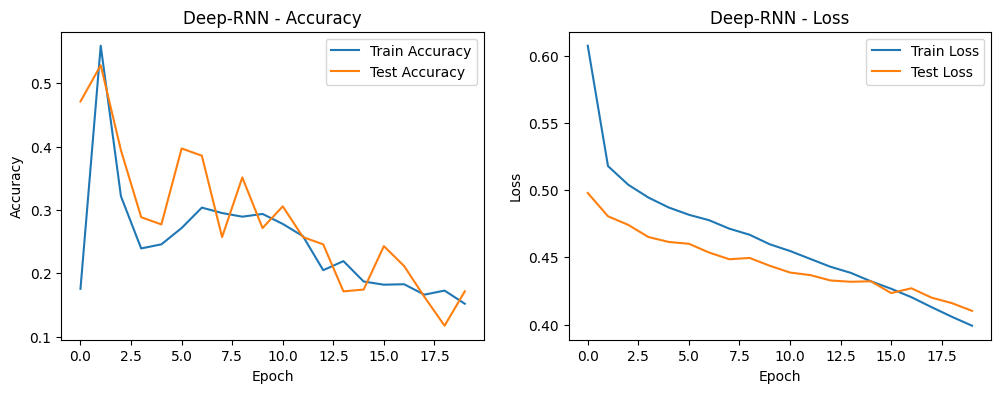

In [22]:
plot_results(history_drnn, "Deep-RNN")

In [23]:
model_drnn.save('models/model_drnn.keras')

### Test

In [24]:
model_drnn = load_model('models/model_drnn.keras')

In [25]:
y_pred_drnn = model_drnn.predict(X_test_rnn)
y_pred_drnn = (y_pred_drnn > 0.5).astype(int)
# Оценка для каждого из 7 дней
for i in range(7):
    print(f"Day {i+1}:")
    print(classification_report(y_test_rnn[:, i], y_pred_drnn[:, i]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Day 1:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        92
           1       0.84      0.96      0.90       345

    accuracy                           0.82       437
   macro avg       0.75      0.64      0.67       437
weighted avg       0.80      0.82      0.80       437

Day 2:
              precision    recall  f1-score   support

           0       0.66      0.43      0.52        92
           1       0.86      0.94      0.90       345

    accuracy                           0.83       437
   macro avg       0.76      0.69      0.71       437
weighted avg       0.82      0.83      0.82       437

Day 3:
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        92
           1       0.88      0.93      0.91       345

    accuracy                           0.85       437
   macro avg       0.78      0.73      0.75       437
weighted avg 

In [26]:
X_test_rnn[:1].shape

(1, 7, 7)

In [27]:
yt = model_drnn.predict(X_test_rnn[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [28]:
yt[0]

array([0.8316947 , 0.8728234 , 0.91745424, 0.97245765, 0.9664186 ,
       0.63232815, 0.84852093], dtype=float32)

## Bidirectional RNN

### Compile

In [29]:
model_brnn = Sequential(
    [
        Bidirectional(
            LSTM(
                64, input_shape=(window_size, X_train.shape[1]), return_sequences=True
            ),
        ),
        Dropout(0.1),
        Bidirectional(
            LSTM(32),
        ),
        # Dense(32),
        Dense(7, activation="sigmoid"),
    ]
)

model_brnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
history_brnn = model_brnn.fit(
    X_train_rnn, y_train_rnn,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0941 - loss: 0.6365 - val_accuracy: 0.0371 - val_loss: 0.4830
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0837 - loss: 0.5044 - val_accuracy: 0.0800 - val_loss: 0.4665
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2108 - loss: 0.4832 - val_accuracy: 0.1314 - val_loss: 0.4568
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2076 - loss: 0.4840 - val_accuracy: 0.2514 - val_loss: 0.4530
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2716 - loss: 0.4756 - val_accuracy: 0.2314 - val_loss: 0.4511
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2333 - loss: 0.4601 - val_accuracy: 0.2257 - val_loss: 0.4491
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2067 - loss: 0.4541 - val_accuracy: 0.2543 - val_loss: 0.4443
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2125 - loss: 0.4643 - val_accuracy: 0.2257 - val_loss

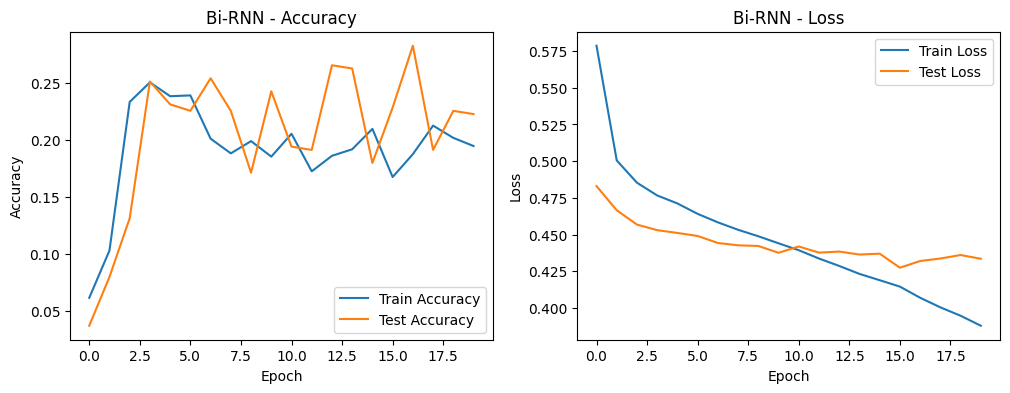

In [31]:
plot_results(history_brnn, "Bi-RNN")

In [32]:
model_drnn.save('models/model_brnn.keras')

### Test

In [33]:
model_brnn = load_model('models/model_brnn.keras')

In [34]:
y_pred_brnn = model_brnn.predict(X_test_rnn)
y_pred_brnn = (y_pred_brnn > 0.5).astype(int)
# Оценка для каждого из 7 дней
for i in range(7):
    print(f"Day {i+1}:")
    print(classification_report(y_test_rnn[:, i], y_pred_brnn[:, i]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Day 1:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        92
           1       0.84      0.96      0.90       345

    accuracy                           0.82       437
   macro avg       0.75      0.64      0.67       437
weighted avg       0.80      0.82      0.80       437

Day 2:
              precision    recall  f1-score   support

           0       0.66      0.43      0.52        92
           1       0.86      0.94      0.90       345

    accuracy                           0.83       437
   macro avg       0.76      0.69      0.71       437
weighted avg       0.82      0.83      0.82       437

Day 3:
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        92
           1       0.88      0.93      0.91       345

    accuracy                           0.85       437
   macro avg       0.78      0.73      0.75       437
weighted avg 

In [35]:
X_test_rnn[:1].shape

(1, 7, 7)

In [36]:
yt = model_brnn.predict(X_test_rnn[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [37]:
yt[0]

array([0.8316947 , 0.8728234 , 0.91745424, 0.97245765, 0.9664186 ,
       0.63232815, 0.84852093], dtype=float32)